<a href="https://colab.research.google.com/github/noobnoob61/DeepLearning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np



In [ ]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()
print(x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
K=len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## NORMAL

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
# Assuming x_train is defined and contains the training data
i = Input(shape=(28, 28, 1))  # Shape of each image in x_train
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(i)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)




x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x)  # Ensure K is defined

model = Model(i, x)




In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

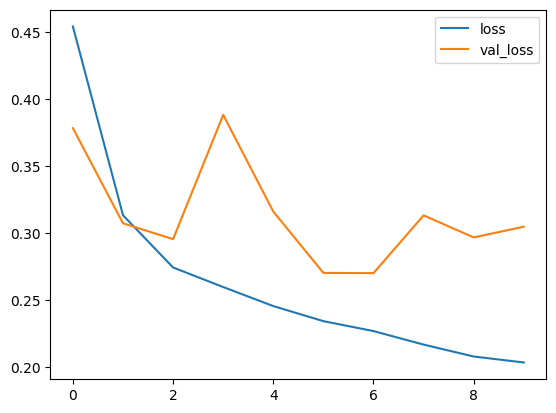

In [ ]:
import  matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

## REGULARIZATION

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
# Assuming x_train is defined and contains the training data
i = Input(shape=(28, 28, 1))  # Shape of each image in x_train
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation="relu",padding='same', kernel_regularizer=l2(0.001))(i)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation="relu",padding='same', kernel_regularizer=l2(0.001))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation="relu",padding='same', kernel_regularizer=l2(0.001))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)




x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x)  # Ensure K is defined

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7001 - loss: 1.2828 - val_accuracy: 0.8580 - val_loss: 0.4934
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8564 - loss: 0.5059 - val_accuracy: 0.8783 - val_loss: 0.4223
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8772 - loss: 0.4263 - val_accuracy: 0.8884 - val_loss: 0.3837
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8844 - loss: 0.3920 - val_accuracy: 0.8906 - val_loss: 0.3820
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8910 - loss: 0.3790 - val_accuracy: 0.8906 - val_loss: 0.3731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8952 - loss: 0.3586 - val_accuracy: 0.8930 - val_loss: 0.3788
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9016 - loss: 0.3422 - val_accuracy: 0.9006 - val_loss: 0.3481
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9025 - loss: 0.3364

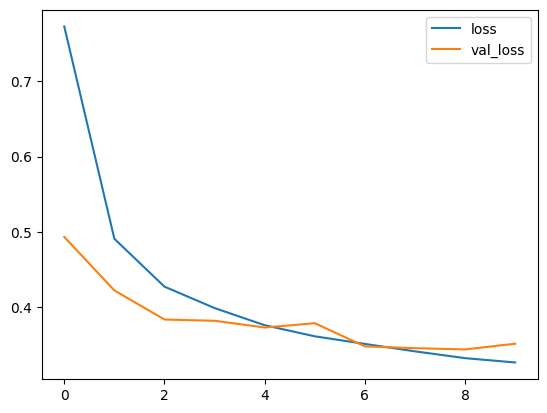

In [ ]:
import  matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

##Batch Normalization

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
# Assuming x_train is defined and contains the training data
i = Input(shape=(28, 28, 1))  # Shape of each image in x_train
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)




x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x)  # Ensure K is defined

model = Model(i, x)



In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7712 - loss: 0.6997 - val_accuracy: 0.8804 - val_loss: 0.3344
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8762 - loss: 0.3480 - val_accuracy: 0.8939 - val_loss: 0.2965
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8953 - loss: 0.2912 - val_accuracy: 0.9028 - val_loss: 0.2757
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9068 - loss: 0.2600 - val_accuracy: 0.8963 - val_loss: 0.2813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9141 - loss: 0.2381 - val_accuracy: 0.9000 - val_loss: 0.2781
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9198 - loss: 0.2184 - val_accuracy: 0.9131 - val_loss: 0.2446
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2033 - val_accuracy: 0.9180 - val_loss: 0.2450
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9306 - loss: 0.1865 

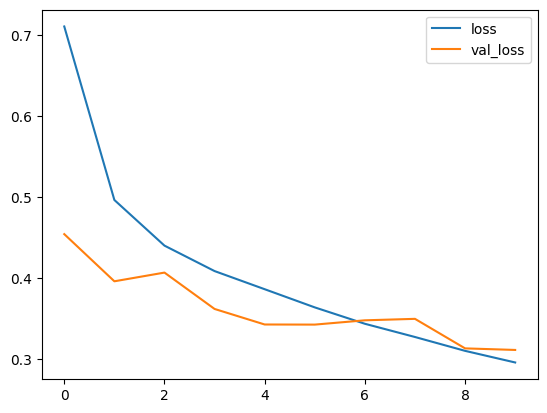

In [ ]:
import  matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

## NORMALIZATION & REGULARIZATION

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
# Assuming x_train is defined and contains the training data
i = Input(shape=(28, 28, 1))  # Shape of each image in x_train
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation="relu",padding='same', kernel_regularizer=l2(0.001))(i)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(i)
x = BatchNormalization()(x)
x = BatchNormalization()(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation="relu",padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation="relu",padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)




x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x)  # Ensure K is defined

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7356 - loss: 0.9472 - val_accuracy: 0.8791 - val_loss: 0.4543
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8476 - loss: 0.5132 - val_accuracy: 0.8865 - val_loss: 0.3960
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8676 - loss: 0.4507 - val_accuracy: 0.8880 - val_loss: 0.4068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8844 - loss: 0.4054 - val_accuracy: 0.9008 - val_loss: 0.3618
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8925 - loss: 0.3862 - val_accuracy: 0.9092 - val_loss: 0.3426
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8977 - loss: 0.3616 - val_accuracy: 0.9046 - val_loss: 0.3424
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9064 - loss: 0.3349 - val_accuracy: 0.9083 - val_loss: 0.3477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9103 - loss: 0.32

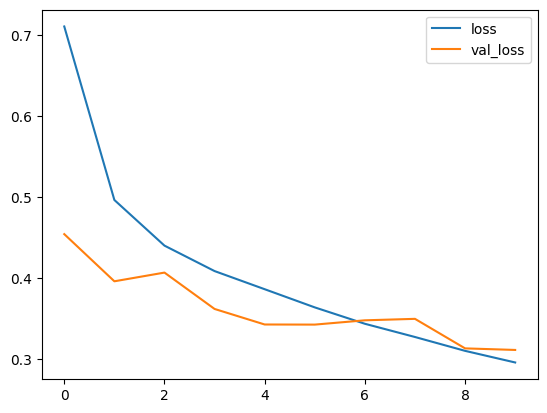

In [ ]:
import  matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

##NEW

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Input layer
i = Input(shape=(28, 28, 1))  # Shape of each image in x_train

# First Conv Layer with reduced regularization
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', kernel_regularizer=l2(0.0001))(i)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second Conv Layer with reduced regularization
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Third Conv Layer with reduced regularization
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten the feature map before passing to Dense layer
x = Flatten()(x)

# Dense Layer with reduced dropout
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)  # Reduce dropout to 30%

# Output Layer
x = Dense(K, activation='softmax')(x)  # Ensure K is defined

# Model creation
model = Model(i, x)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7827 - loss: 0.6458 - val_accuracy: 0.8840 - val_loss: 0.3310
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8824 - loss: 0.3473 - val_accuracy: 0.8776 - val_loss: 0.3512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8996 - loss: 0.3083 - val_accuracy: 0.8877 - val_loss: 0.3417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9112 - loss: 0.2797 - val_accuracy: 0.9016 - val_loss: 0.3008
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9189 - loss: 0.2583 - val_accuracy: 0.9062 - val_loss: 0.3132
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9275 - loss: 0.2446 - val_accuracy: 0.9016 - val_loss: 0.3451
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9297 - loss: 0.2371 - val_accuracy: 0.9060 - val_loss: 0.3364
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9355 - loss: 0.2250 

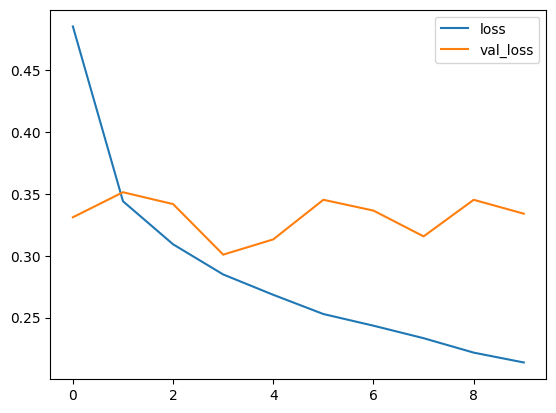

In [ ]:
import  matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

## DATA AUGMENTATION

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
# Assuming x_train is defined and contains the training data
i = Input(shape=(28, 28, 1))  # Shape of each image in x_train
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(i)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation="relu",padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)




x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x)  # Ensure K is defined

model = Model(i, x)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6530 - loss: 1.3030 - val_accuracy: 0.8520 - val_loss: 0.4062
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8417 - loss: 0.4393 - val_accuracy: 0.8760 - val_loss: 0.3401
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8738 - loss: 0.3529 - val_accuracy: 0.8851 - val_loss: 0.3103
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8851 - loss: 0.3210 - val_accuracy: 0.8823 - val_loss: 0.3265
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8917 - loss: 0.2914 - val_accuracy: 0.8974 - val_loss: 0.2940
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8993 - loss: 0.2765 - val_accuracy: 0.9012 - val_loss: 0.2827
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9053 - loss: 0.2617 - val_accuracy: 0.8996 - val_loss: 0.2908
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9089 - loss: 0.24

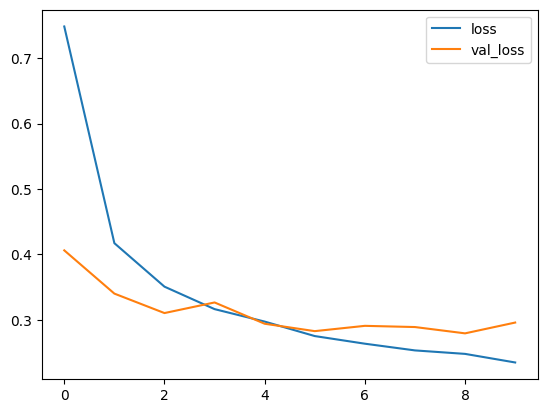

In [ ]:
import  matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

##

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[940   0  14  13   2   0  29   0   2   0]
 [  3 985   0  10   0   0   0   0   2   0]
 [ 22   1 890  10  39   0  38   0   0   0]
 [ 27   5   9 922  13   0  22   0   2   0]
 [  0   0 100  38 810   0  52   0   0   0]
 [  0   0   0   0   0 974   0  17   0   9]
 [208   3  83  29  63   0 609   0   5   0]
 [  0   0   0   0   0   8   0 963   0  29]
 [  4   0   0   4   1   1   5   1 983   1]
 [  0   0   0   0   0   3   1  21   0 975]]


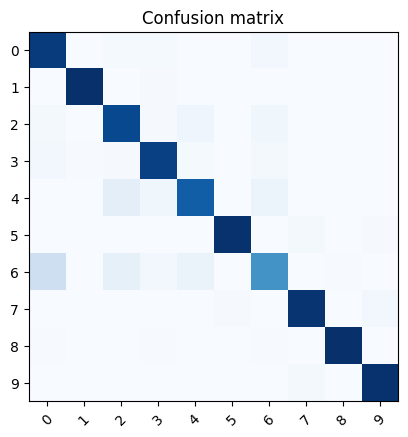

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
#label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Text(0.5, 1.0, 'true label: Dress predicted: T-shirt/top')

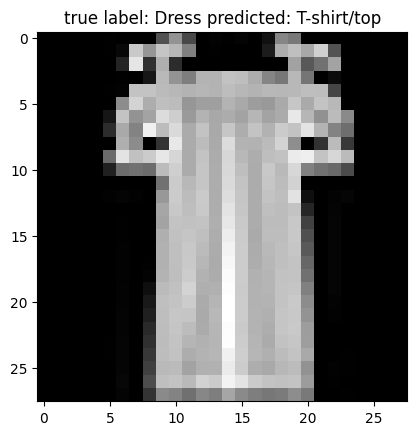

In [ ]:
#show some misclassified examples
MissingValues=np.where(p_test!=y_test)[0]
i=np.random.choice(MissingValues)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("true label: %s predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))